## Exploratory Data Analysis

This is a **exploratory data analysis** for **limit order book (LOB)** and **trade and quote (TAQ)** datasets for *March 14th, 2022* regarding the HFT Liquidity Pinnacle Research Project, 2023.

This was written by **Sidharth Peri** *('24 BSQF, '25 MSFE)* and **Sid Bhatia** *('24 BSQF, '25 MSML + MSFE)* on *06/05/2023*.

Please reach out with any questions via [LinkedIn](https://www.linkedin.com/in/siddharthbhatia555/) or email: [speri3@stevens.edu](mailto:speri13@stevens.edu), [sbhatia2@stevens.edu](mailto:sbhatia2@stevens.edu)/[siddharth.bhatia789@gmail.com](mailto:siddharth.bhatia789@gmail.com).

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [72]:
def eda_taq(path, tkr):
    df = pd.read_csv(path)
    trades = df[df["Type"] == "Trade"]
    quotes = df[df["Type"] == "Quote"]
    quotes = quotes[quotes["Bid Price"] != 0]
    
    prices_norm = shapiro(trades["Price"])
    print("Normality of Trade Prices: ", prices_norm.pvalue > .05)
    
    prices_nvol = shapiro(trades["Volume"])
    print("Normality of Trade Volume: ", prices_nvol.pvalue > .05)
    
    bprices_norm = shapiro(quotes["Bid Price"])
    print("Normality of Quoted Bid Prices: ", bprices_norm.pvalue > .05)
    
    aprices_norm = shapiro(quotes["Ask Price"])
    print("Normality of Quoted Ask Prices: ", aprices_norm.pvalue > .05)
    
    fig, ax = plt.subplots(2, 2)

    ax[0,0].hist(trades["Price"], edgecolor='black', bins=20, color = 'b') #row=0, col=0
    ax[0,0].set_title("Trade Prices")
    ax[0,0].set_xlim([min(trades["Price"]), max(trades["Price"])])
    
    ax[0,1].hist(trades["Volume"], edgecolor='black', bins=20, color = 'r') #row=1, col=0
    ax[0,1].set_title("Trade Volumes")
    ax[0,1].set_xlim([min(trades["Volume"]), max(trades["Volume"])])
    
    ax[1,0].hist(quotes["Bid Price"], edgecolor='black', bins=20, color = "orange") #row=0, col=1
    ax[1,0].set_title("Quoted Bid Prices")
    ax[1,0].set_xlim([min(quotes["Bid Price"]), max(quotes["Bid Price"])])
    
    ax[1, 1].hist(quotes["Ask Price"], edgecolor='black', bins=20, color = 'g') #row=1, col=1
    ax[1,1].set_title("Quoted Ask Prices")
    ax[1,1].set_xlim([min(quotes["Ask Price"]), max(quotes["Ask Price"])])
    
    fig.suptitle(tkr + " TAQ EDA")
    fig.tight_layout(h_pad=5, w_pad=5)
    plt.savefig(tkr + " TAQ EDA")

In [81]:
#eda_taq("Data\JPM_TAQ_20220314.csv", "JPM")
#eda_taq("Data\CVX_TAQ_20220314.csv", "CVX")
#eda_taq("Data\GME_TAQ_20220314.csv", "GME")
#eda_taq("Data\XOM_TAQ_20220314.csv", "XOM")

In [90]:
def eda_lob(path, tkr):
    df = pd.read_csv(path)
    
    fig, ax = plt.subplots(2, 2)

    ax[0,0].hist(df["L1-BidPrice"], edgecolor='black', bins=20, color = 'b') #row=0, col=0
    ax[0,0].set_title("L1 Bid Prices")
    
    ax[0,1].hist(df["L1-AskPrice"], edgecolor='black', bins=20, color = 'r') #row=0, col=0
    ax[0,1].set_title("L1 Ask Prices")
    
    ax[1,0].hist(df["L2-BidPrice"], edgecolor='black', bins=20, color = 'orange') #row=0, col=0
    ax[1,0].set_title("L2 Bid Prices")
    
    ax[1,1].hist(df["L2-AskPrice"], edgecolor='black', bins=20, color = 'g') #row=0, col=0
    ax[1,1].set_title("L2 Ask Prices")
    
    fig.suptitle(tkr + " LOB EDA")
    fig.tight_layout(h_pad=5, w_pad=5)
    plt.savefig(tkr + " LOB Histogram EDA")
    
    fig1, ax1 = plt.subplots(2, 2)
    ax1[0,0].scatter(np.arange(len(df["L1-BidPrice"])), df["L1-BidPrice"], color = "blue", label = "Bid")
    ax1[0,0].scatter(np.arange(len(df["L1-AskPrice"])), df["L1-AskPrice"], color = "red", label = "Ask")
    ax1[0,0].set_title("L1 Bid and Ask Prices")
    ax1[0,0].legend()
    ax1[0,1].scatter(np.arange(len(df["L2-BidPrice"])), df["L2-BidPrice"], color = "blue")
    ax1[0,1].scatter(np.arange(len(df["L2-AskPrice"])), df["L2-AskPrice"], color = "red")
    ax1[0,1].set_title("L2 Bid and Ask Prices")
    
    ax1[1,0].scatter(np.arange(len(df["L3-BidPrice"])), df["L3-BidPrice"], color = "blue")
    ax1[1,0].scatter(np.arange(len(df["L3-AskPrice"])), df["L3-AskPrice"], color = "red")
    ax1[1,0].set_title("L3 Bid and Ask Prices")
    
    ax1[1,1].scatter(np.arange(len(df["L4-BidPrice"])), df["L4-BidPrice"], color = "blue")
    ax1[1,1].scatter(np.arange(len(df["L4-AskPrice"])), df["L4-AskPrice"], color = "red")
    ax1[1,1].set_title("L4 Bid and Ask Prices")
    
    fig1.suptitle(tkr + " LOB Bid-Ask Prices")
    fig1.tight_layout(h_pad=5, w_pad=5)
    plt.savefig(tkr + " LOB Bid-Ask EDA")

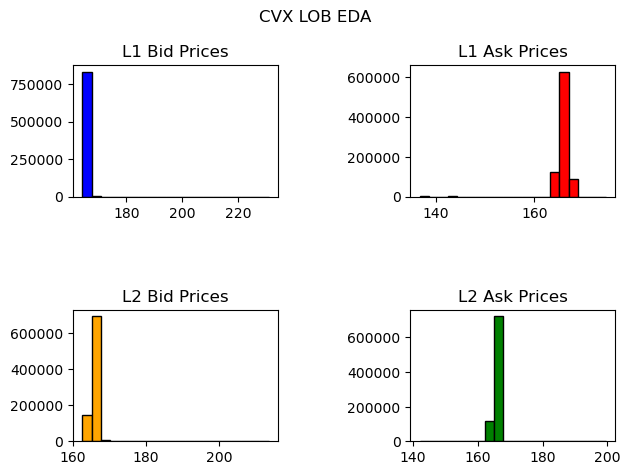

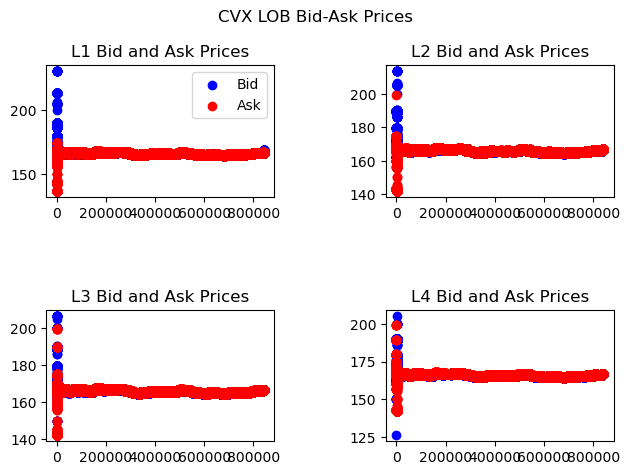

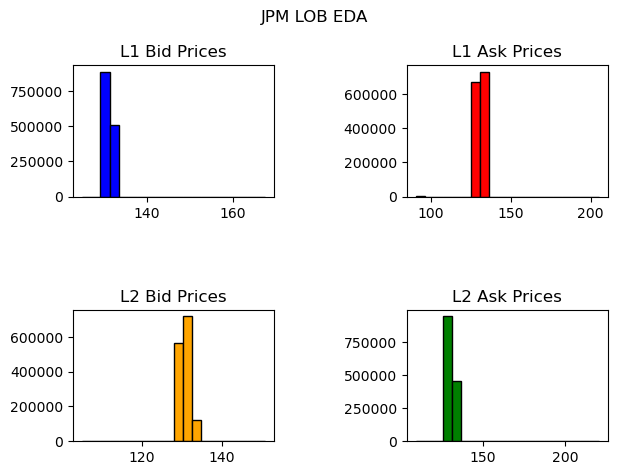

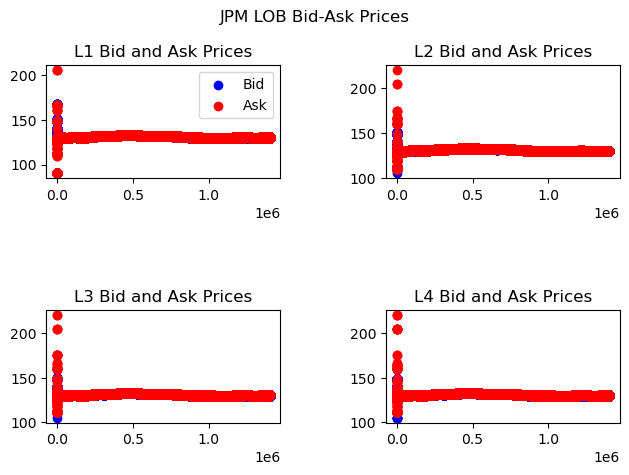

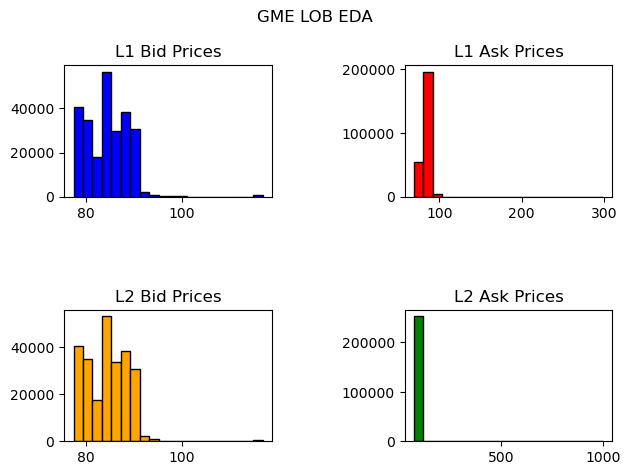

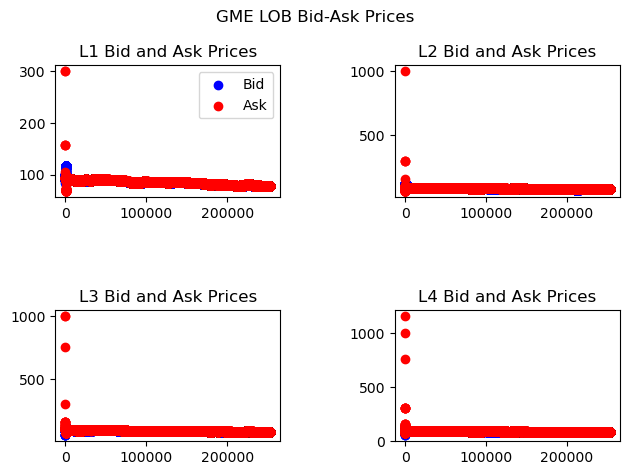

In [91]:
eda_lob("Data\CVX_LOB_20220314.csv", "CVX")
eda_lob("Data\JPM_LOB_20220314.csv", "JPM")
eda_lob("Data\GME_LOB_20220314.csv", "GME")